# Auxilliary Function

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt
x = list(range(-20,21))
x = np.linspace(-20,20,200)

In [35]:
def f_x(x_in):
    # takes in a vector or list of values
    fx = math.log((math.exp(x_in)+math.exp(-x_in))/2)
    fx = math.log(math.cosh(x_in))       
    return fx

def f_prime(x_in):
    f_prime = (math.exp(2*x_in) - 1)/(math.exp(2*x_in) + 1)
    return f_prime


def Q_x_y(x_in,y):
        Q = f_x(y)+f_prime(y)*(x_in-y)+1/2*(x_in-y)**2
        return Q
 

In [36]:
f_x(2)

1.3250027473578645

In [37]:
### MAIN FUNC ###

fx      = []
Qx_neg2 = []
Qx_3    = []

for x_in in x:
    fx.extend([f_x(x_in)])
    Qx_neg2.extend([Q_x_y(x_in,-2)])
    Qx_3.extend([Q_x_y(x_in,3)])
    

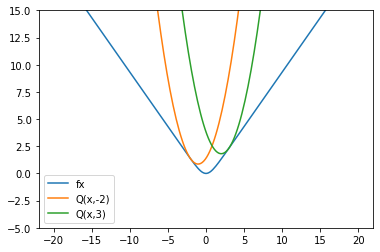

In [38]:
plt.plot(x,fx)
plt.plot(x,Qx_neg2)
plt.plot(x,Qx_3)
plt.ylim(-5,15)
plt.legend(['fx','Q(x,-2)','Q(x,3)'])
plt.show()

##    6.4f

In [349]:
def argmin_Q(x_o):
    
    arg_min = x_o - f_prime(x_o)
    
    return arg_min
 

In [350]:
min_iter = -2 # initialize the x_o at -2
next_guess = [-2]
next_guess_val = [Q_x_y(-2,-2)]
for i in range(-20,21):
    
    min_iter = argmin_Q(min_iter)
    next_guess.extend([min_iter])
    
    next_guess_val.extend([Q_x_y(next_guess[-1],next_guess[-1])])
    
    
    
min_iter = 3 # initialize the x_o at -2
next_guess3 = [3]
next_guess_val3 = [Q_x_y(3,3)]
for i in range(-20,21):
    
    min_iter = argmin_Q(min_iter)
    next_guess3.extend([min_iter])
    
    next_guess_val3.extend([Q_x_y(next_guess3[-1],next_guess3[-1])])

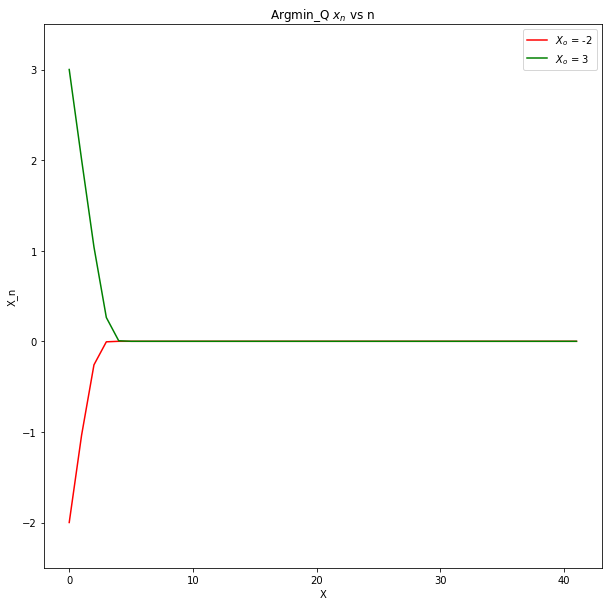

In [351]:
plt.figure(figsize = (10,10))
plt.plot(list(range(42)),next_guess,color='red')
plt.plot(list(range(42)),next_guess3,color='green')
plt.ylim(-2.5,3.5)
plt.legend(['$X_o$ = -2','$X_o$ = 3'])
plt.title('Argmin_Q $x_n$ vs n')
plt.xlabel('X')
plt.ylabel('X_n')
plt.show()

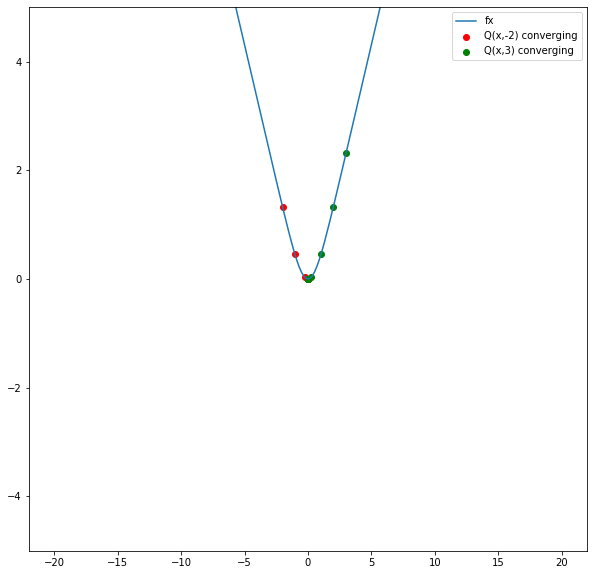

In [51]:
plt.figure(figsize = (10,10))
plt.plot(x,fx)
plt.scatter(next_guess,next_guess_val,color='red')
plt.scatter(next_guess3,next_guess_val3,color='green')
plt.ylim(-5,5)
plt.legend(['fx','Q(x,-2) converging','Q(x,3) converging'])
plt.show()


## 6.4 G root finding code ####

This section finds the upper bound for convergence for newtons method. The newton's method implementation of the logcosh(x) is below that

In [305]:
def newton_root(xo):
    x_new = xo - base_func(xo)/dir_func(xo)
    return x_new

def base_func(xo):
    x_base = ((math.exp(xo)-math.exp(-xo))*\
              (math.exp(xo)+math.exp(-xo))/8) - xo
    return x_base 

def dir_func(xo):
    x_dir = ((math.exp(xo)-math.exp(-xo))**2 +\
             (math.exp(xo)+math.exp(-xo))**2)/8 - 1
    return x_dir

Equation for $y = ((e^{x}+e^{-x})\times (e^{x}-e^{-x}))/8 - x$ plotted below

This equation is the root finding equation to find the upper bound of values for which the 2nd order newtons method will converge


In [306]:
x_in = np.linspace(-3,3,100000)
y_base = []
for i in range(len(x_in)):
    y_base.extend([base_func(x_in[i])])

(-5, 5)

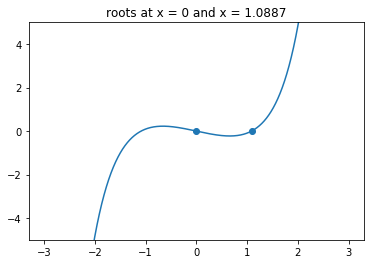

In [307]:
plt.plot(x_in,y_base)
plt.scatter([0,1.0887],[0,0])
plt.title('roots at x = 0 and x = 1.0887')
plt.ylim(-5,5)

## the newtons method converges for values X > 0 and X < 1.0087

upper bound found below

In [308]:
error = 1
x_new = 2
x_vals = [x_new]
y_val = [base_func(x_new)]
i = 0
while error > .001:
    x_new = newton_root(x_new)
    x_vals.extend([x_new])
    y_val.extend([base_func(x_new)])
    error = np.abs(0-base_func(x_new))
    i += 1
    if i>1000:
        break

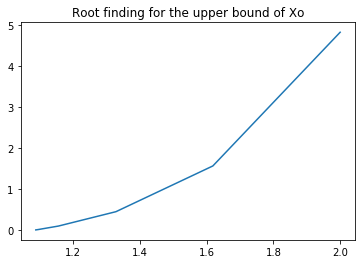

In [309]:
plt.plot(x_vals,y_val)
plt.title('Root finding for the upper bound of Xo')
plt.show()

In [310]:
print('The upper bound of Xo is: %.4f'%x_vals[-1])

The upper bound of Xo is: 1.0887


## What happens outside of the upper bound?

In [312]:
def second_order_newton(xo):
    x_new = xo - ((math.exp(xo)-math.exp(-xo))*\
              (math.exp(xo)+math.exp(-xo))/4)
    return x_new

In [315]:
x_in = np.linspace(0,3,100000)
y_base = []
for i in range(len(x_in)):
    y_base.extend([second_order_newton(x_in[i])])

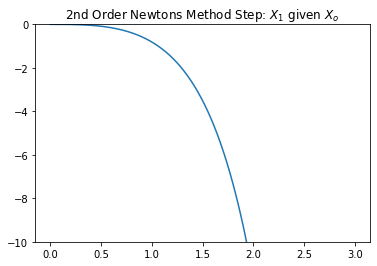

In [323]:
plt.plot(x_in,y_base)
plt.title('2nd Order Newtons Method Step: $X_{1}$ given $X_o$')
plt.ylim(-10,0)
plt.show()

## 6.4 H

In [331]:
def summative_cosh(x_in,k):
    g_x = 0
    for i in range(1,k+1):
        g_x += math.log(math.cosh(x_in + 2/(math.sqrt(i))))
    
    return g_x/k

In [333]:
x_in = np.linspace(-20,20,100000)
y_base = []
for i in range(len(x_in)):
    y_base.extend([summative_cosh(x_in[i],10)])

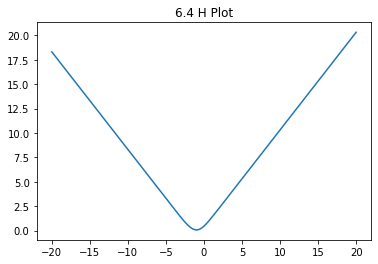

In [334]:
plt.plot(x_in,y_base)
plt.title('6.4 H Plot')
plt.show()

## 6.4 K

In [352]:
def step_update(x_in,k):
    k_val = 0
    for i in range(1,k+1):
        k_val += (math.exp(x_in + 2/math.sqrt(i))-math.exp(-(x_in + 2/math.sqrt(i))))/\
                 (math.exp(x_in + 2/math.sqrt(i))+math.exp(-(x_in + 2/math.sqrt(i))))
    x_out = x_in - 1/k*k_val    
    
    return x_out
    

In [353]:
x_o = 3
x_new = [x_o]
y_val = [summative_cosh(x_o,10)]
for i in range(30):
    x_o = step_update(x_o,10)
    y_val.extend([summative_cosh(x_o,10)])
    x_new.extend([x_o])

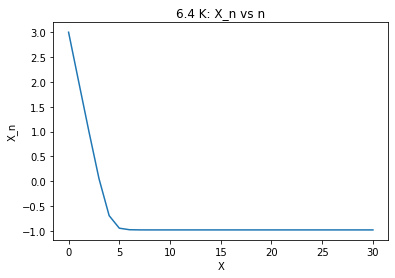

In [354]:
plt.plot(list(range(31)),x_new)
plt.title('6.4 K: X_n vs n')
plt.xlabel('X')
plt.ylabel('X_n')
plt.show()

## minimum @ -.97998

In [356]:
x_new[-5:]

[-0.9799826574435251,
 -0.9799826574435251,
 -0.9799826574435251,
 -0.9799826574435251,
 -0.9799826574435251]